# CSE 6367 Programming Assignment 1 (P1)

## Spring 2023

## Due: 11:59pm Central Time, Friday, March 17, 2023

In [ ]:
import cv2
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageOps


### Task 1 (10 points) 

Import the "colors.png" image and convert the image to HSV

change the value/brightness value in the HSV image to 50%, convert the HSV back to RGB, and display the result.

In [ ]:
# to view picture in BGR format

def load_picture(path):
  color_img_png = cv2.imread(path)
  return color_img_png, cv2.cvtColor(color_img_png, cv2.COLOR_BGR2GRAY)

color_img_png, gray = load_picture('./Images/color.png')

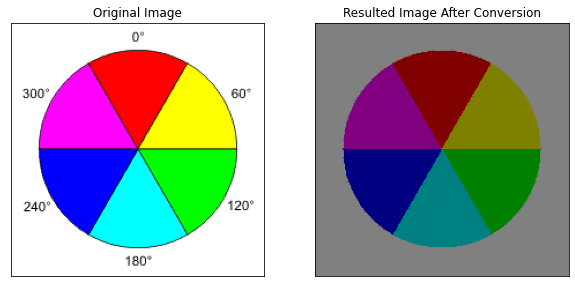

In [ ]:
def plot_Result(color_img_png, hsv_format_rgb):
    # Show the source picture
    fig, my_axis = plt.subplots(1, 2, figsize=(10, 5))

    # Show the outcome picture
    my_axis[0].imshow(cv2.cvtColor(color_img_png, cv2.COLOR_BGR2RGB))
    my_axis[0].set_title('Original Image')

    # Display the result image
    my_axis[1].imshow(cv2.cvtColor(hsv_format_rgb, cv2.COLOR_BGR2RGB))
    my_axis[1].set_title('Resulted Image After Conversion')

    # Take the marks off the x and y axes.
    for ax in my_axis:
        ax.set_xticks([])
        ax.set_yticks([])

    # Show the story.
    plt.show()

def bgr_hsv(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

def hsv_to_rgb_method(img):
  return cv2.cvtColor(img, cv2.COLOR_HSV2BGR)


def hsv_rgb(color_img_png):
    # the picture into HSV format

    hsv_format = bgr_hsv(color_img_png)

    # Put 50% as the new number or brightness.

    hsv_format[:,:,2] = 128

    # Restore the image's RGB representation.
    hsv_format_rgb = hsv_to_rgb_method(hsv_format)
    return hsv_format_rgb

    
hsv_format_rgb = hsv_rgb(color_img_png)
plot_Result(color_img_png, hsv_format_rgb)

### Task 2 (20 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.

    a) Flip the image left-right
    b) Rotate the image by 45 degree
    c) Resize the image as 200 X 200 image

Display the original image with a, b, c images in a 2X2 grid

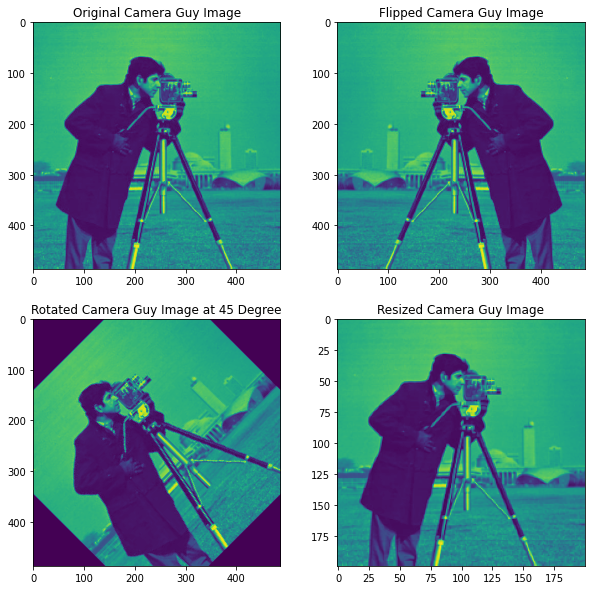

In [ ]:
# Load picture
camera_guy_jpeg = np.array(Image.open('./Images/cameraman.jpeg'))

#Image rotation: left-to-right

def flipping_method(camera_guy_jpeg):
    flipped_camera_guy = np.fliplr(camera_guy_jpeg)
    return flipped_camera_guy

def rotate(image):
  return image.rotate(45)


def img_array(image):
  return Image.fromarray(image)
# Turn the picture 45 degrees.
def rotating_method(camera_guy_jpeg):
    image = img_array(camera_guy_jpeg)
    rotated_camera_guy = rotate(image)
    return np.array(rotated_camera_guy)

def resize_img(image):
  return image.resize((200, 200))
# The picture should now be 200 x 200.

def resizing_to_200(camera_guy_jpeg):
    image = img_array(camera_guy_jpeg)
    resized_camera_guy = resize_img(image)
    return np.array(resized_camera_guy)

# Show the pictures
def display_result_fxn(flipped_camera_guy, rotated_camera_guy, resized_camera_guy):
    fig, axis = plt.subplots(2, 2, figsize=(10, 10))
    axis[0, 0].imshow(camera_guy_jpeg)
    axis[0, 0].set_title('Original Camera Guy Image')
    axis[0, 1].imshow(flipped_camera_guy)
    axis[0, 1].set_title('Flipped Camera Guy Image')
    axis[1, 0].imshow(rotated_camera_guy)
    axis[1, 0].set_title('Rotated Camera Guy Image at 45 Degree')
    axis[1, 1].imshow(resized_camera_guy)
    axis[1, 1].set_title('Resized Camera Guy Image')
    plt.show()

flipped_camera_guy = flipping_method(camera_guy_jpeg)
rotated_camera_guy = rotating_method(camera_guy_jpeg)
resized_camera_guy = resizing_to_200(camera_guy_jpeg)
display_result_fxn(flipped_camera_guy, rotated_camera_guy, resized_camera_guy)

### Task3 (10 points)

Binarization : Image binarization converts an image to an image with only two levels (usually 0 and 1 or black and white).

Import the "zebra.jpeg" image, convert to grayscale and apply binarization on the image with threshold = 127 or 0.5 



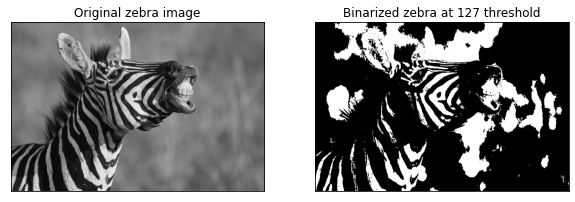

In [ ]:
# Open the picture and make it grayscale.
zebra_jpeg = Image.open('./Images/zebra.jpeg').convert('L')

def binary_array(image):
  return np.asarray(image)

def img_array(image):
  return Image.fromarray(image)
# Binarization with 127 as the criterion
def img_binary_threshold(zebra_jpeg):
    threshold_value = 127
    binary_converted_img = zebra_jpeg.copy()
    binary_converted_img = binary_array(binary_converted_img)
    binary_converted_img[binary_converted_img < threshold_value] = 0
    binary_converted_img[binary_converted_img >= threshold_value] = 255
    return img_array(binary_converted_img)

def display_binary_result(zebra_jpeg, binary_converted_img):
    # Present binaryized and original pictures
    fig, axis = plt.subplots(1, 2, figsize=(10, 5))
    axis[0].imshow(zebra_jpeg, cmap='gray')
    axis[0].set_title('Original zebra image')
    axis[0].set_xticks([])
    axis[0].set_yticks([])

    axis[1].imshow(binary_converted_img, cmap='gray')
    axis[1].set_title('Binarized zebra at 127 threshold')
    axis[1].set_xticks([])
    axis[1].set_yticks([])

    plt.show()

binary_converted_img = img_binary_threshold(zebra_jpeg)
display_binary_result(zebra_jpeg, binary_converted_img)


### Task 4 (20 points) 
Average Filtering

    a) Import the "cameraman.jpeg"
    b) perform average filtering with kernel size 3X3, 5X5 and 9X9. 

Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 2X2 grid. 

In [ ]:

camera_img = Image.open('./Images/cameraman.jpeg').convert('L')
color_img_cv2 = cv2.imread('./Images/cameraman.jpeg')
gray = cv2.cvtColor(color_img_cv2, cv2.COLOR_BGR2GRAY)

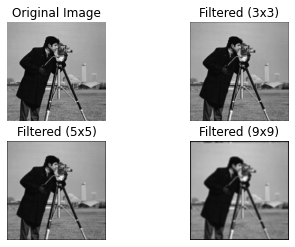

In [ ]:
def gray_filter(gray,changed_kernel_sized):
  my_kernel = np.ones((changed_kernel_sized, changed_kernel_sized), np.float32) / changed_kernel_sized**2
  return  gray.filter(ImageFilter.Kernel((changed_kernel_sized, changed_kernel_sized), my_kernel.flatten(), scale=1))

# Kernel size: 3 by 3
def kernel_3_by_3_Filter(gray):
  changed_kernel_sized = 3
  img_filter =  gray_filter(gray,changed_kernel_sized)
  img_padded = ImageOps.expand(img_filter, border=changed_kernel_sized//2, fill=0)
  return img_padded

# Kernel size: 5 by 5
def kernel_5_by_5_filter(gray):
  changed_kernel_sized = 5
  img_filter =gray_filter(gray,changed_kernel_sized)
  img_padded = ImageOps.expand(img_filter, border=changed_kernel_sized//2, fill=0)
  return img_padded

# Kernel size: 9 by 9
def kernel_9_by_9_filter(gray):
  changed_kernel_sized = 9
  my_kernel = np.ones((changed_kernel_sized, changed_kernel_sized), np.float32) / changed_kernel_sized**2
  filtered_img_array = np.abs(np.fft.ifft2(np.fft.fft2(gray) * np.fft.fft2(my_kernel, s=gray.shape))).astype(np.uint8)

  # Convert the filtered image back to a PIL Image object
  img_filter = np.array(filtered_img_array)
  img_padded = cv2.copyMakeBorder(img_filter, changed_kernel_sized//2, changed_kernel_sized//2, changed_kernel_sized//2, changed_kernel_sized//2, cv2.BORDER_CONSTANT, value=0)
  return img_padded

# Use Pyplot to display the filtered picture.
def filtered_display_result(camera_img, padded_img_3, padded_img_5, padded_img_9):
  fig, axs = plt.subplots(2, 2)

  axs[0, 0].imshow(camera_img, cmap='gray')
  axs[0, 0].set_title("Original Image")

  axs[0, 1].imshow(padded_img_3, cmap='gray')
  axs[0, 1].set_title("Filtered (3x3)")

  axs[1, 0].imshow(padded_img_5, cmap='gray')
  axs[1, 0].set_title("Filtered (5x5)")

  axs[1, 1].imshow(padded_img_9, cmap='gray')
  axs[1, 1].set_title("Filtered (9x9)")

  for ax in axs.flat:
      ax.axis('off')

  plt.show()

padded_img_3 = kernel_3_by_3_Filter(camera_img)
padded_img_5 = kernel_5_by_5_filter(camera_img)
padded_img_9 = kernel_9_by_9_filter(gray)
filtered_display_result(camera_img, padded_img_3, padded_img_5, padded_img_9)

### Task 5 (20 points)

Median Filtering

    a) Add salt and pepper noise as 30% of all pixels in "cameraman.jpeg" image
    b) Perform median filtering with kernel size 3X3, 5X5 and 9X9. 
    
Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 2X2 grid. 

*a) Add salt and pepper noise as 30% of all pixels in "cameraman.jpeg" image.*

<ipython-input-10-91e3af7ed219>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy_camera[number_perpper] = 255
<ipython-input-10-91e3af7ed219>:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy_camera[cored_pper] = 0


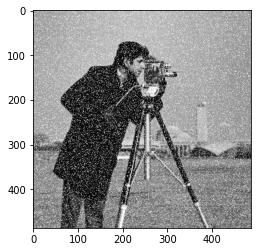

In [ ]:
# Add salt and pepper to make img_noisy
def noise(img):
  return np.zeros(img.shape, np.uint8)
def add_salt_and_pepper_noise(img_gray):
    img_gray_array = np.array(img_gray)
    noisy_camera = noise(img_gray_array)
    salty_img = 0.3  # fraction of pixels to be replaced
    ceil_sal = np.ceil(salty_img * img_gray_array.size * 0.5)
    ceil_pepper = np.ceil(salty_img * img_gray_array.size * 0.5)
    number_perpper = [np.random.randint(0, i - 1, int(ceil_sal)) for i in img_gray_array.shape]
    cored_pper = [np.random.randint(0, i - 1, int(ceil_pepper)) for i in img_gray_array.shape]
    noisy_camera[number_perpper] = 255
    noisy_camera[cored_pper] = 0
    noisy_gray = cv2.add(img_gray_array, noisy_camera)

    noisy_rgb = cv2.cvtColor(noisy_gray, cv2.COLOR_GRAY2RGB)
    return noisy_rgb

# Use Pyplot to display the noisy picture.
plt.imshow(add_salt_and_pepper_noise(camera_img))
plt.show()



b) Perform median filtering with kernel size 3X3, 5X5 and 9X9. 

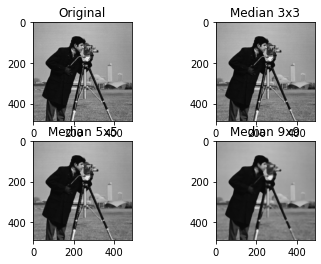

In [ ]:

# Use 3x3, 5x5, and 9x9 kernel sizes for median filtering.
def filtering_media(camera_guy):
    median_done_3 = camera_guy.filter(ImageFilter.MedianFilter(size=3))
    median_done_5 = camera_guy.filter(ImageFilter.MedianFilter(size=5))
    median_done_9 = camera_guy.filter(ImageFilter.MedianFilter(size=9))
    return median_done_3, median_done_5, median_done_9

def conversion(np_median):
  return Image.fromarray(cv2.cvtColor(np_median, cv2.COLOR_BGR2RGB))
# RGB conversion
def bgr_2_rgb_fxn(camera_img, median3, median5, median9):

    camera_img = np.array(camera_img)
    np_median3 = np.array(median3)
    np_median5 = np.array(median5)
    np_median9 = np.array(median9)

    img = Image.fromarray(cv2.cvtColor(camera_img, cv2.COLOR_BGR2RGB))
    res_median3 = conversion(np_median3)
    res_median5 =conversion(np_median5)
    res_median9 = conversion(np_median9)
    return img, res_median3, res_median5, res_median9


# Use Pyplot to display the raw and filtered images.
def plot_res(img, median3, median5, median9):
  plt.subplot(2, 2, 1)
  plt.imshow(img)
  plt.title("Original")

  plt.subplot(2, 2, 2)
  plt.imshow(median3)
  plt.title("Median 3x3")

  plt.subplot(2, 2, 3)
  plt.imshow(median5)
  plt.title("Median 5x5")

  plt.subplot(2, 2, 4)
  plt.imshow(median9)
  plt.title("Median 9x9")

  plt.show()



median3, median5, median9 = filtering_media(camera_img)
img, median3, median5, median9 = bgr_2_rgb_fxn(camera_img, median3, median5, median9)
plot_res(img, median3, median5, median9)




### Task 6 (20 points)
Sobel Edge Detection

    a) Apply horizontal and vertical sobel filters on the "cameraman.jpeg" image.
    b) Display the Sobel magnitude image

a) Apply horizontal and vertical sobel filters on the "cameraman.jpeg" image.

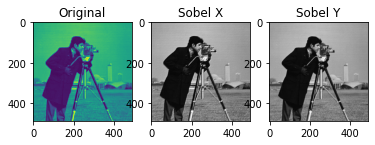

In [ ]:
def filter_apply(img):
  return img.filter(ImageFilter.Kernel((3, 3), tuple(np.random.randint(-2, 3, size=9))))
# Use the Sobel filters, both horizontal and vertical.
def sobel_filter(gray):
  sober_filter_x = filter_apply(gray)
  dober_filter_y = filter_apply(gray)
  return sober_filter_x, dober_filter_y

# Show the unaltered and filtered pictures.
def display_Result(img, sobelx, sobely):
  plt.subplot(1, 3, 1)
  plt.imshow(img)
  plt.title("Original")

  plt.subplot(1, 3, 2)
  plt.imshow(sobelx, cmap="gray")
  plt.title("Sobel X")

  plt.subplot(1, 3, 3)
  plt.imshow(sobely, cmap="gray")
  plt.title("Sobel Y")

  plt.show()


sobelx, sobely = sobel_filter(camera_img)
display_Result(camera_img,sobelx, sobely)

b) Display the Sobel magnitude image

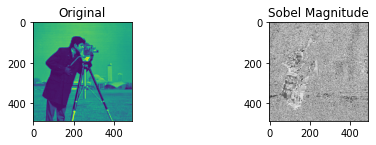

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Determine the gradient's extent.
def grad_sobel_mag_fxn(sobelx, sobely):
  grad_sobel_mag = np.sqrt(np.square(sobelx) + np.square(sobely))
  return grad_sobel_mag

# Show the unaltered and filtered pictures.
def grad_sobel_mag_display(img, grad_sobel_mag):
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original")

    plt.subplot(1, 3, 3)
    plt.imshow(grad_sobel_mag, cmap="gray")
    plt.title("Sobel Magnitude")

    plt.show()


grad_sobel_mag = grad_sobel_mag_fxn(sobelx, sobely)
grad_sobel_mag_display(camera_img, grad_sobel_mag)

## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
